# Gradient Descent Update Rule

Given the mean squared error as our loss function: 

$$MSE = \frac{1}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$$

We can find the update rule for a single iteration of gradient descent by finding the partial derivative with respect to both $\beta_0$ and $\beta_1$

$$
\begin{align}
\frac{\partial MSE}{\partial \beta_0} & = \frac{1}{n} \sum_{i = 1}^n \frac{\partial}{\partial \beta_0} (y_i - (\beta_0 + \beta_1 x_i))^2\\
    & = - \frac{2}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i))
\end{align}
$$

$$
\newline
$$

$$
\begin{align}
\frac{\partial MSE}{\partial \beta_1} & = \frac{1}{n} \sum_{i = 1}^n \frac{\partial}{\partial \beta_1} (y_i - (\beta_0 + \beta_1 x_i))^2\\
    & = - \frac{2}{n} \sum_{i = 1}^n x_i (y_i - (\beta_0 + \beta_1 x_i))
\end{align}
$$

Then, our update rule for gradient descent is as follows:

$$\beta_0 \leftarrow \beta_0 - \lambda \bigg[ - \frac{2}{n} \sum_{i = 1}^n (y_i - (\beta_0 + \beta_1 x_i)) \bigg]$$

$$\beta_1 \leftarrow \beta_1 - \lambda \bigg[ - \frac{2}{n} \sum_{i = 1}^n x_i (y_i - (\beta_0 + \beta_1 x_i)) \bigg]$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
def gradient_descent(X, y, lr=0.05, epochs=100):
    N = len(X)
    w0, w1 = np.random.rand(2, 1)

    for i in range(epochs):       
        f = y - (w0 + w1 * X)
        w0 -= lr * (-2 * f.sum() / N)
        w1 -= lr * (-2 * X.dot(f).sum() / N)

    return [w0, w1]

In [3]:
X = np.array([1, 2, 3, 5])
y = np.array([0, 2, 4, 5])

w = gradient_descent(X, y)
y_pred = w[0] + w[1] * X

Final weights:  [-0.48272745] [1.18654149]
Prediction:  [0.70381404 1.89035553 3.07689703 5.44998002]
MSE:  0.3904943059627628
R^2:  0.8941032390609457


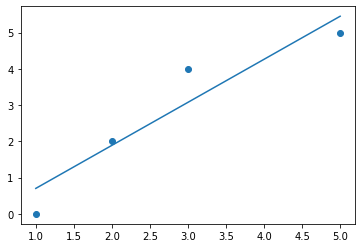

In [5]:
print('Final weights: ', w[0], w[1])
print('Prediction: ', y_pred)
print('MSE: ', mean_squared_error(y, y_pred))
print('R^2: ', r2_score(y, y_pred))

plt.plot(X, y_pred)
plt.scatter(X, y)

# Model Fit
We see that $R^2 = 0.893$, which means the variation in y can be explained relatively accurately by X.

From our model, $Y = \beta_0 + \beta_1 X$, we know that $\beta_0$ is our y-intercept and $\beta_1$ is the slope of the line. Another way to describe $\beta_1$ is to say that the target $y$ increases by about 1.187 when the predictor $x$ increases by 1.

---

# Bootstrapping/Bagging

In [200]:
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor
from scipy import stats

In [188]:
x = np.linspace(0, 100, 500)
y = x + 2 * np.random.randn(len(x))
n_estimators = 1000
beta0 = []
beta1 = []

In [189]:
model = BaggingRegressor(linear_model.LinearRegression(),
                        n_estimators=n_estimators,
                        bootstrap=True,
                        max_samples=500)

model.fit(x.reshape(500,1), y)

for m in model.estimators_:
    beta0.append(m.intercept_)
    beta1.append(m.coef_[0])

In [218]:
print('mean beta0: {}, beta0 stddev: {}\nmean beta1: {}, beta stddev: {}'.format(
    np.mean(beta0),
    np.std(beta0),
    np.mean(beta1),
    np.std(beta1))
 )

mean beta0: 0.22096165702572723, beta0 stddev: 0.17350137995383452
mean beta1: 0.9970651455284375, beta stddev: 0.0029584749849354223


MSE =  3.987338149636537
R^2 =  0.9952283378826288


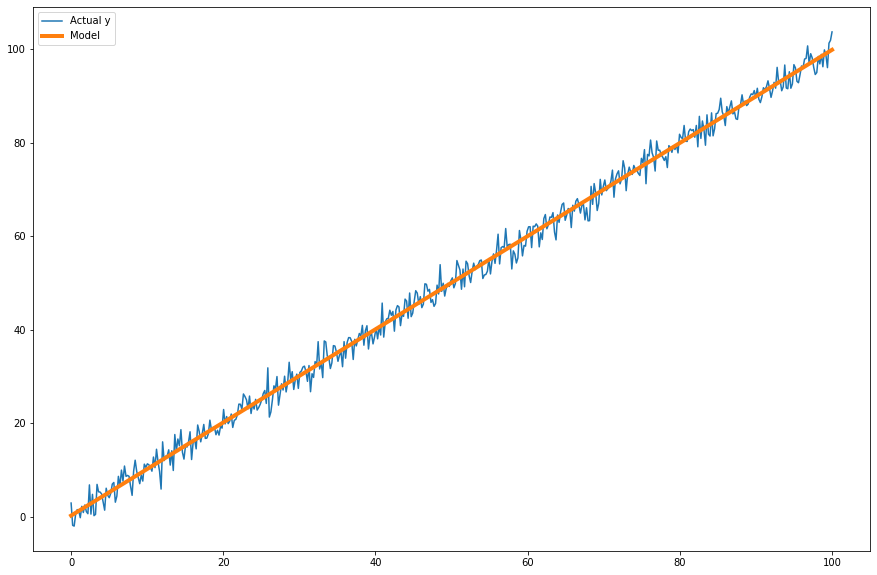

In [191]:
y_pred = np.mean(beta0) + np.mean(beta1) * x

plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.plot(x, y_pred, linewidth=4)
plt.legend(['Actual y', 'Model'])

print('MSE = ', mean_squared_error(y, y_pred))
print('R^2 = ', r2_score(y, y_pred))

# 4 ways to calculate Standard Error

In [192]:
np.sqrt(np.var(beta0)), np.sqrt(np.var(beta1))

(0.17350137995383452, 0.0029584749849354223)

In [193]:
np.std(beta0), np.std(beta1)

(0.17350137995383452, 0.0029584749849354223)

In [194]:
sigma = np.sqrt(len(x) * mean_squared_error(y, y_pred) / (len(x) - 2))
seb0 = sigma * np.sqrt( (1/len(x)) + (x.mean() ** 2) / np.sum((x - x.mean()) ** 2))
seb1 = sigma / np.sqrt(np.sum((x - x.mean()) ** 2))
seb0, seb1

(0.17869226000825897, 0.0030934912752512665)

In [195]:
sigma = np.sqrt(np.sum( ((y_pred - y) ** 2) / (len(x) - 2) ))
seb0 = sigma * np.sqrt( (1/len(x)) + (x.mean() ** 2) / np.sum((x - x.mean()) ** 2))
seb1 = sigma / np.sqrt(np.sum((x - x.mean()) ** 2))
seb0, seb1

(0.17869226000825897, 0.0030934912752512665)

# Beta1 distribution, t-test, and p-value

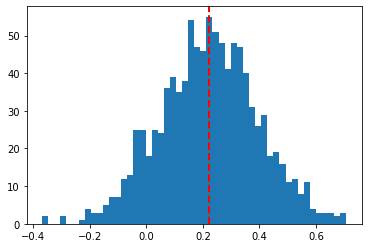

In [205]:
plt.hist(beta0, bins=50)
plt.axvline(np.mean(beta0), color='red', linestyle='dashed', linewidth=2)

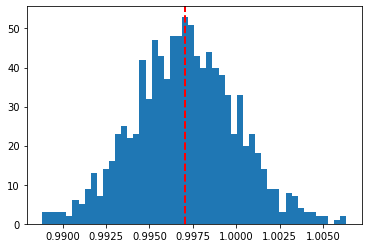

In [204]:
plt.hist(beta1, bins=50)
plt.axvline(np.mean(beta1), color='red', linestyle='dashed', linewidth=2)

In [226]:
stats.ttest_1samp(beta1, 1)

Ttest_1sampResult(statistic=-31.354610755381128, pvalue=8.343410960625843e-151)

In [243]:
tt = (np.mean(beta1) - 1) / np.sqrt(np.var(beta1) / len(x))
pval = stats.t.sf(np.abs(tt), len(x)-1) * 2
tt, pval

(-22.182151736619183, 2.261090940801526e-76)